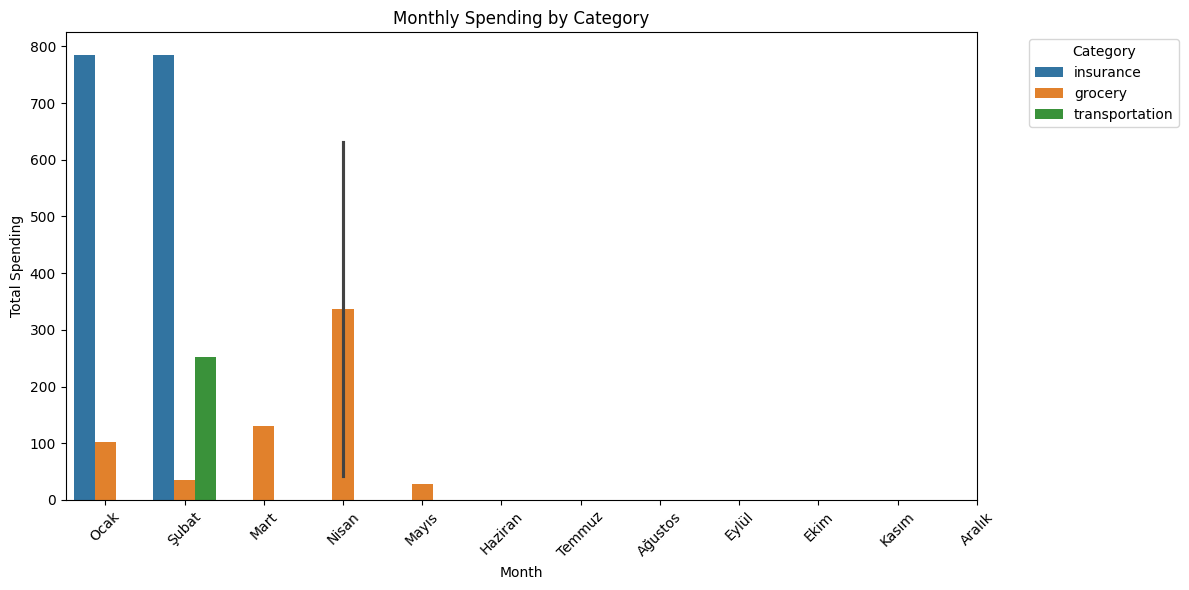

Average Grocery Spending (Cold Days): 54.91
Average Grocery Spending (Warm Days): 155.81
T-Statistic: -1.13
P-Value: 0.3615
Result: The hypothesis is not statistically significant (p >= 0.05).
There is no significant difference in grocery spending between cold and warm days.


In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# 1. Load Data Files
credit_card_file = "/content/DSA MAIN EXCEL.second.xlsx"
weather_file = "/content/tables.xlsx"

# Load credit card data
credit_card_data = pd.read_excel(credit_card_file)
weather_data = pd.read_excel(weather_file)

# Convert 'Date' column to datetime format
credit_card_data["Date"] = pd.to_datetime(credit_card_data["Date"], format="%d.%m.%Y", errors='coerce')

# Map month names to numbers
month_map = {
    "Ocak": 1, "Şubat": 2, "Mart": 3, "Nisan": 4, "Mayıs": 5, "Haziran": 6,
    "Temmuz": 7, "Ağustos": 8, "Eylül": 9, "Ekim": 10, "Kasım": 11, "Aralık": 12
}

# Extract month information and convert to numbers
weather_data["Month"] = weather_data["Dates"].str.extract(r'([A-Za-zğüşıöçÇİĞÖŞ]+)')[0].map(month_map)

# Create dates for the year 2024 with the first day of each month
current_year = 2024
weather_data["Date"] = pd.to_datetime(weather_data["Month"].astype(str) + '-01-' + str(current_year), format='%m-%d-%Y', errors='coerce')

# Rename columns
credit_card_data.rename(columns={"transaction ": "Transactions"}, inplace=True)

# Merge datasets
merged_data = pd.merge(credit_card_data, weather_data, on="Date", how="inner")

# Convert 'Transactions' column to numeric
merged_data["Transactions"] = pd.to_numeric(merged_data["Transactions"].astype(str).str.replace(",", "."), errors='coerce')

# Drop rows with missing values
cleaned_data = merged_data.dropna(subset=["Temperature", "category", "Transactions"])

# 2. Visualization of Spending by Month
plt.figure(figsize=(12, 6))
sns.barplot(
    data=cleaned_data,
    x="Month",
    y="Transactions",
    hue="category",
    estimator=np.sum
)
plt.title("Monthly Spending by Category")
plt.xlabel("Month")
plt.ylabel("Total Spending")
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(ticks=np.arange(0, 12), labels=list(month_map.keys()), rotation=45)
plt.tight_layout()
plt.show()

# 3. Hypothesis Testing for Grocery Spending in Cold Weather
# Define temperature category
threshold = 15  # Temperature threshold in Celsius
cleaned_data["Temp_Category"] = np.where(cleaned_data["Temperature"] < threshold, "Cold", "Warm")

# Filter data for grocery category
grocery_data = cleaned_data[cleaned_data["category"] == "grocery"]

# Separate spending for cold and warm days
cold_spending = grocery_data[grocery_data["Temp_Category"] == "Cold"]["Transactions"]
warm_spending = grocery_data[grocery_data["Temp_Category"] == "Warm"]["Transactions"]

# Calculate means
cold_mean = cold_spending.mean()
warm_mean = warm_spending.mean()

# Perform t-test
t_stat, p_value = ttest_ind(cold_spending, warm_spending, equal_var=False)

# Print results
print(f"Average Grocery Spending (Cold Days): {cold_mean:.2f}")
print(f"Average Grocery Spending (Warm Days): {warm_mean:.2f}")
print(f"T-Statistic: {t_stat:.2f}")
print(f"P-Value: {p_value:.4f}")

# Hypothesis Result
if p_value < 0.05:
    print("Result: The hypothesis is statistically significant (p < 0.05).")
    print("Grocery spending is significantly higher on cold days.")
else:
    print("Result: The hypothesis is not statistically significant (p >= 0.05).")
    print("There is no significant difference in grocery spending between cold and warm days.")
